<a href="https://colab.research.google.com/github/hristijanpeshov/SHAP-Explainable-Lexicon-Model/blob/master/classification_report_and_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# User Input

In [ ]:
# enter the results folder for the lexicon sources
lexicons_folder_map = {
    'nasdaq': '/content/drive/MyDrive/nasdaq/concatenated datasets/results',
    'fpb': '/content/drive/MyDrive/fpb/concatenated datasets/results',
    'sentfin': '/content/drive/MyDrive/sentfin/concatenated datasets/results'
}


# Please choose the desired combination for extracting the classification report
# and confusion matrix

# enter the source lexicon name
# allowed values for source_lexicon: nasdaq, fpb or sentfin
source_lexicon = 'nasdaq'

# enter the type of the lexicon
# allowed values for normalized: True, False
normalized = True

# enter the evaluation dataset name
# allowed values for eval_dataset: fpb_fiqa, dev_df, financial_phrase_bank, fiqa_labeled_df
eval_dataset = 'financial_phrase_bank'

# Classification Report and Confusion Matrix

In [ ]:
import pandas as pd
import re

def find_and_print_segment(line, start_pattern, end_pattern, title):
  start_index = line.find(start_pattern)
  end_index = line.find(end_pattern)

  if start_index != -1 and end_index != -1:
      extracted_content = line[start_index + len(start_pattern):end_index]
      extracted_content = extracted_content.replace('\\n', '\n')

      print(title)
      if title == 'Confusion Matrix:':
        pattern = r'\[[^]]+\]'

        matches = re.findall(pattern, extracted_content)

        for match in matches:
            print(match)
      else:
        print(extracted_content)
      print()

def extract_classification_report_and_conf_matrix(file_path):
  with open(file_path, 'r') as file:
    concat_lines = ''
    for line in file:
      if 'OUR WORDS' in line or 'LMD' in line:
        l = line.replace('OUR WORDS', 'XLex').replace('LMD', 'LM')
        if 'accuracy score' in l:
          l = l.split('LM accuracy score')[0]
          l = l +'\n'

        find_and_print_segment(concat_lines, "array([", '))', 'Confusion Matrix:')
        print()
        print()
        print()
        print()
        concat_lines = ''

        print('Results for: ', l)

      concat_lines += line.strip()

      find_and_print_segment(line, "}, '", "', array", 'Classification Report:')

    find_and_print_segment(concat_lines, "array([", '))', 'Confusion Matrix:')
    print()
    print()

In [ ]:
import gdown
import os

def check_input_vals_and_run_extraction(source_lexicon, normalized, eval_dataset, lexicons_folder_map):
  if source_lexicon not in ['nasdaq', 'fpb', 'sentfin']:
    raise ValueError('Selected lexicon name is not contained in the allowed names')

  if normalized not in [True, False]:
    raise ValueError('Normalized must be True or False')

  if eval_dataset not in ['fpb_fiqa', 'dev_df', 'financial_phrase_bank', 'fiqa_labeled_df']:
    raise ValueError('Selected eval dataset name is not contained in the allowed names')

  normalized_name = 'normalized' if normalized else 'merged'

  print(f'Showing classification report and confusion matrix for the lexicon: {source_lexicon}, using its {normalized_name} version, on eval dataset: {eval_dataset}')

  base_path = lexicons_folder_map[source_lexicon]
  base_path_modified = base_path if base_path[-1] == '/' else f'{base_path}/'

  file_path = f'{base_path_modified}/{source_lexicon}-{normalized_name}-{eval_dataset}.txt'
  extract_classification_report_and_conf_matrix(file_path)

In [ ]:
check_input_vals_and_run_extraction(source_lexicon, normalized, eval_dataset, lexicons_folder_map)

Showing classification report and confusion matrix for the lexicon: nasdaq, using its normalized version, on eval dataset: financial_phrase_bank




Results for:  XLex + LM

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.74      0.51       111
           1       0.96      0.84      0.89       774

    accuracy                           0.82       885
   macro avg       0.68      0.79      0.70       885
weighted avg       0.89      0.82      0.85       885


Confusion Matrix:
[ 82,  29]
[126, 648]





Results for:  XLex

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.41      0.56      0.48       111
           1       0.93      0.89      0.91       774

    accuracy                           0.84       885
   macro avg       0.45      0.48      0.46       885
weighted avg       0.87      0.84      0.85       885


Confu

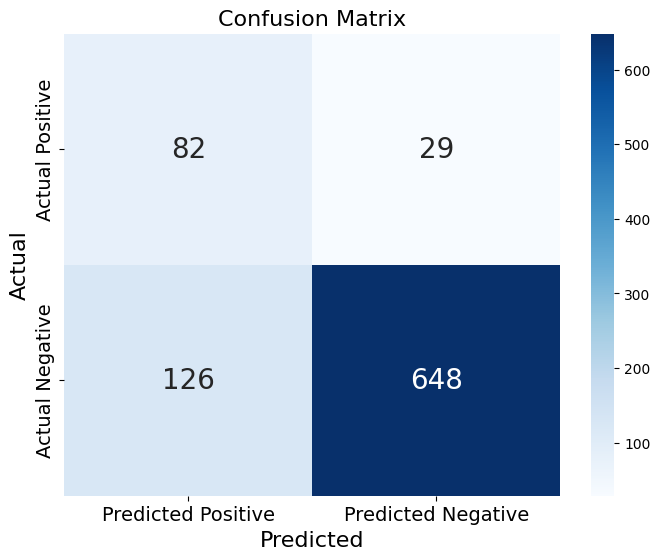

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define TP, TN, FP, FN for the XLex + LM combination
TP = 82
TN = 648
FP = 29
FN = 126

# Create a confusion matrix
confusion_matrix = [[TP, FP], [FN, TN]]

# Set labels for the matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Reshape the matrix to a 2x2 grid
confusion_matrix = [TP, FP, FN, TN]
confusion_matrix = [confusion_matrix[i:i + 2] for i in range(0, len(confusion_matrix), 2)]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'], annot_kws={"size": 20})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix', fontsize=16)
plt.show()